<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#01-Introduction" data-toc-modified-id="01-Introduction-1">01 Introduction</a></span></li><li><span><a href="#02-Sigmoid" data-toc-modified-id="02-Sigmoid-2">02 Sigmoid</a></span></li><li><span><a href="#03-求解$J(\theta)$" data-toc-modified-id="03-求解$J(\theta)$-3">03 求解$J(\theta)$</a></span></li><li><span><a href="#04-决策边界" data-toc-modified-id="04-决策边界-4">04 决策边界</a></span></li></ul></div>

# 01 Introduction

逻辑回归：解决分类问题

将样本的特征与样本发生的概率联系起来，返回结果是样本发生的概率，是一个数，因此属于回归算法

只可以解决二分类问题

预测值p>0.5是第一类，<0.5是第二类

# 02 Sigmoid

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# sigmoid 值域为(0, 1)
# 当t>0时,p>0.5
# 当t<0时,p<0.5
# 当t=0时，p=0.5
def sigmoid(t):
    return 1/(1+np.exp(-t))

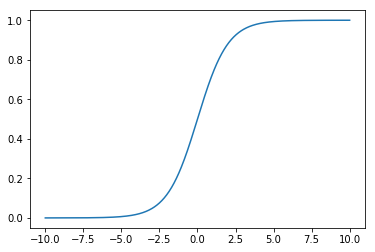

In [5]:
x = np.linspace(-10, 10, 500)
y = sigmoid(x)

plt.plot(x,y)
plt.show()

# 03 求解$J(\theta)$

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# sigmoid(t)
def sigmoid(t):
    return 1./(1.+np.exp(-t))

# J(theta)
def J(theta, Xb, y):
    p_hat = sigmoid(Xb.dot(theta))
    return - np.sum(y * np.log(p_hat) + (1-y) * np.log(1-p_hat)) / len(y)
# dJ(theta)
def dJ(theta,Xb,y):
    return Xb.T.dot(sigmoid(Xb.dot(theta)) - y) / len(y)

# graident_decent
def graident_decent(initial_theta, Xb, y, eta=0.01, n_iters=1e4, epsilon=1e-8):
    theta = initial_theta
    i_iter = 1
    while i_iter <= n_iters:
        gradient = dJ(theta, Xb, y)
        last_theta = theta
        theta = theta - eta*gradient
        if(abs(J(theta, Xb, y)-J(last_theta,Xb, y))<epsilon):
            break
        i_iter += 1
    return theta

# 拼接Xb
def get_Xb(X): 
    return np.hstack([np.ones(shape=(len(X),1)),X])

# 返回预测概率
def predict_pro(fitted_theta, X_test):
    X_b = get_Xb(X_test)
    return sigmoid(X_b.dot(fitted_theta))

# 返回预测值，概率数组中>0.5的值为1
def predict(fitted_theta, X_test):
    pro = predict_pro(fitted_theta, X_test)
    return np.array(pro>=0.5, dtype='int')

In [7]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y<2,:2]
y = y[y<2]

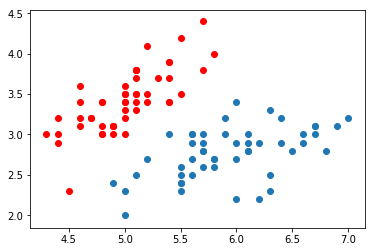

In [8]:
plt.scatter(X[y==0,0], X[y==0,1], color='r')
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

Xb = get_Xb(X_train)
initial_theta = np.zeros(Xb.shape[1])
theta = graident_decent(initial_theta, Xb, y_train)
predict_pro(theta, X_test)

array([0.92972035, 0.98664939, 0.14852024, 0.17601199, 0.0369836 ,
       0.0186637 , 0.04936918, 0.99669244, 0.97993941, 0.74524655,
       0.04473194, 0.00339285, 0.26131273, 0.0369836 , 0.84192923,
       0.79892262, 0.82890209, 0.32358166, 0.06535323, 0.20735334])

In [10]:
predict(theta, X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [11]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

# 04 决策边界

In [12]:
def x2(theta, x1):
    return -(theta[0] + theta[1]*x1) / theta[2]   

In [13]:
x1_plot = np.linspace(4, 8,1000)
x2_plot = x2(theta, x1_plot)

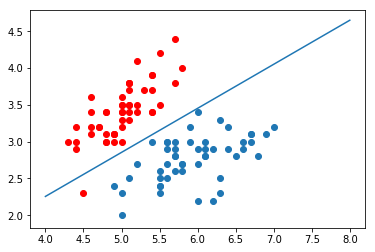

In [14]:
plt.plot(x1_plot,x2_plot)
plt.scatter(X[y==0,0], X[y==0,1], color='r')
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

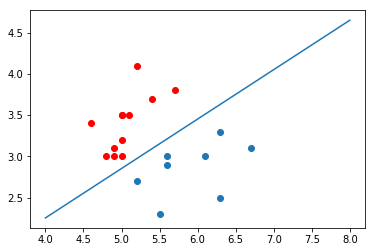

In [15]:
# 只看预测结果
plt.plot(x1_plot,x2_plot)
plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1], color='r')
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1])
plt.show()